In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [2]:
# helper functions

#  pairwise Euclidean distance matrix
def distance_matrix(coords):
    n = len(coords)
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = np.linalg.norm(coords[i] - coords[j])
            dist[i, j] = d
            dist[j, i] = d
    return dist

# total length of the route
def route_length(route, dist_matrix):
    length = 0
    for i in range(len(route) - 1):
        length += dist_matrix[route[i], route[i+1]]
    return length

# swap two random stations in the route, except the first (fixed start)
def propose_swap(route):
    new_route = route.copy()
    n = len(route) - 1  # last is same as first, exclude from swap
    i, j = np.random.choice(range(1, n), size=2, replace=False)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# type of cooling scheme, methods proposed in exercises
def cooling_schedule(k, method="sqrt"):
    if method == "sqrt":
        return 1 / np.sqrt(k + 1)
    elif method == "log":
        return -np.log(k + 1) if k > 0 else 1
    else:
        return 1 / np.sqrt(k + 1)  # default
    
def propose_2opt(route):
    new_route = route.copy()
    n = len(route) - 1  # exclude last node (same as first)
    i, j = sorted(np.random.choice(range(1, n), size=2, replace=False))
    # reverse segment between i and j
    new_route[i:j+1] = new_route[i:j+1][::-1]
    return new_route
    
def plot_route(coords, route):
    plt.figure(figsize=(8, 8))
    plt.plot(coords[route, 0], coords[route, 1], 'o-', color='blue', markersize=8)
    plt.plot(coords[route[0], 0], coords[route[0], 1], 'ro', markersize=12)  # start/end in red
    plt.title("TSP route found by simulated annealing")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.grid(True)
    plt.show()

In [3]:
def simulated_annealing_tsp(input_data, iterations=10000, cooling="sqrt", is_coords=False):
    # convert coordinates to distance matrix if needed
    if is_coords:
        cost_matrix = distance_matrix(input_data)
    else:
        cost_matrix = input_data
        
    n = len(cost_matrix)
    
    # initial state: random permutation except fixed start/end
    route = np.arange(n)
    np.random.shuffle(route[1:])
    route = np.append(route, route[0])  # end where started
    
    current_length = route_length(route, cost_matrix)
    best_route = route.copy()
    best_length = current_length
    
    # for tracking progress
    no_improve = 0
    lengths = []
    
    for k in range(iterations):
        T = cooling_schedule(k, method=cooling)
        
        # randomly choose between swap and 2-opt moves
        if np.random.random() < 0.5:
            candidate_route = propose_swap(route)
        else:
            candidate_route = propose_2opt(route)
            
        candidate_length = route_length(candidate_route, cost_matrix)
        delta = candidate_length - current_length
        
        # accept new solution
        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            route = candidate_route
            current_length = candidate_length
            no_improve = 0
        else:
            no_improve += 1
            
        # track best solution
        if current_length < best_length:
            best_length = current_length
            best_route = route.copy()
            no_improve = 0
        
        # record progress every 100 iterations
        if k % 100 == 0:
            lengths.append(best_length)
        
        # early stopping if no improvement for many iterations
        if no_improve > 2000 and T < 0.01:
            print(f"Early stopping at iteration {k}: no improvements for 2000 iterations")
            break
        
        if k % 1000 == 0:
            print(f"Iteration {k}, Temperature {T:.4f}, Current length {current_length:.4f}, Best {best_length:.4f}")
    
    # plot progress
    if len(lengths) > 1:
        plt.figure(figsize=(10, 5))
        plt.plot(range(0, len(lengths)*100, 100), lengths)
        plt.title("Best Solution Quality Over Time")
        plt.xlabel("Iteration")
        plt.ylabel("Route Length")
        plt.grid(True)
        plt.show()
    
    return best_route, best_length

Iteration 0, Temperature 1.0000, Current length 12.0745, Best 12.0745
Iteration 1000, Temperature 0.0316, Current length 4.5201, Best 4.3907
Iteration 2000, Temperature 0.0224, Current length 4.0912, Best 3.9980
Iteration 3000, Temperature 0.0183, Current length 3.9980, Best 3.9980
Iteration 4000, Temperature 0.0158, Current length 3.9980, Best 3.9980
Iteration 5000, Temperature 0.0141, Current length 3.9980, Best 3.9980
Iteration 6000, Temperature 0.0129, Current length 3.9980, Best 3.9980
Iteration 7000, Temperature 0.0120, Current length 3.9980, Best 3.9980
Iteration 8000, Temperature 0.0112, Current length 3.9980, Best 3.9980
Iteration 9000, Temperature 0.0105, Current length 3.9980, Best 3.9980


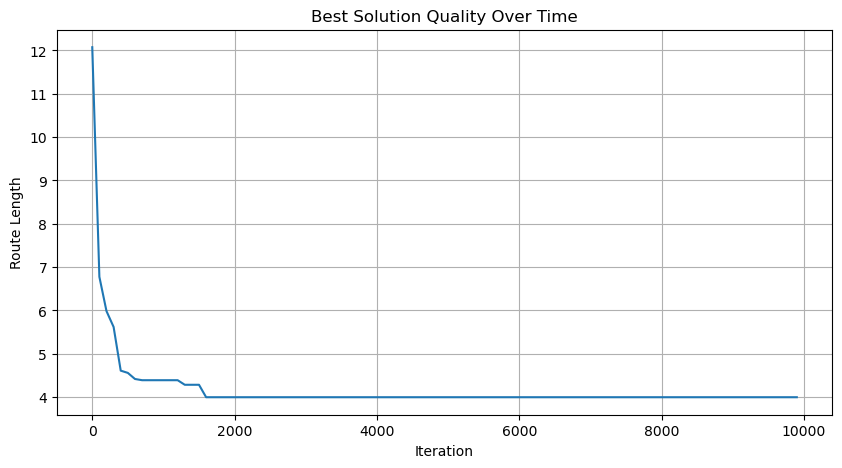

Best route found: [ 0 12 19  3 11 10  7 17 15  5  8 18 14  1  4 13 16  6  2  9  0]
Best route length: 3.9980218490119688


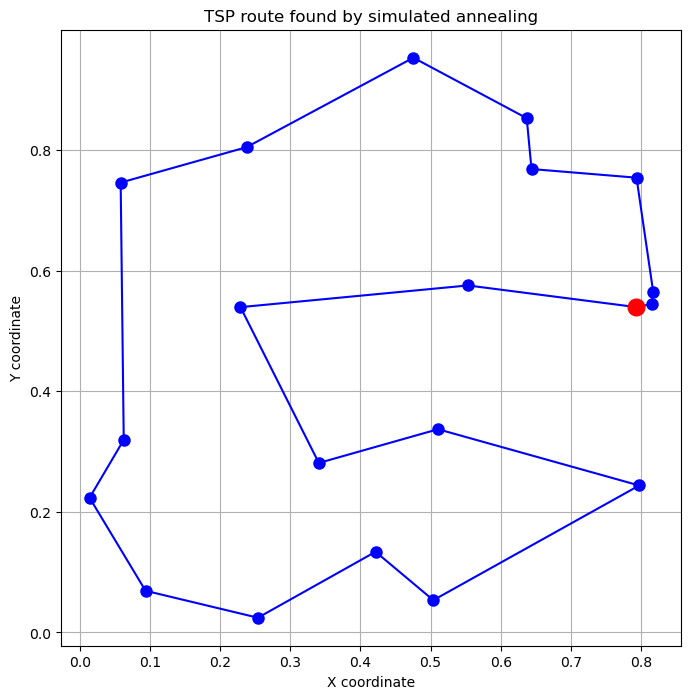

In [4]:
# random 2D coordinates for stations
stations = np.random.rand(20, 2)
    
best_route, best_length = simulated_annealing_tsp(stations, iterations=10000, cooling="sqrt", is_coords=True)
print("Best route found:", best_route)
print("Best route length:", best_length)
plot_route(stations, best_route)

Modifyed for cost matrix

In [5]:
cost_matrix_str = """
0,225,110,8,257,22,83,231,277,243,94,30,4,265,274,250,87,83,271,86
255,0,265,248,103,280,236,91,3,87,274,265,236,8,24,95,247,259,28,259
87,236,0,95,248,110,25,274,250,271,9,244,83,250,248,280,29,26,239,7
8,280,83,0,236,28,91,239,280,259,103,23,6,280,244,259,95,87,230,84
268,87,239,271,0,244,275,9,84,25,244,239,275,83,110,24,274,280,84,274
21,265,99,29,259,0,99,230,265,271,87,5,22,239,236,250,87,95,271,91
95,236,28,91,247,93,0,247,259,244,27,91,87,268,275,280,7,8,240,27
280,83,250,261,4,239,230,0,103,24,239,261,271,95,87,21,274,255,110,280
247,9,280,274,84,255,259,99,0,87,255,274,280,3,27,83,259,244,28,274
230,103,268,275,23,244,264,28,83,0,268,275,261,91,95,8,277,261,84,247
87,239,9,103,261,110,29,255,239,261,0,259,84,239,261,242,24,25,242,5
30,255,95,30,247,4,87,274,242,255,99,0,24,280,274,259,91,83,247,91
8,261,83,6,255,29,103,261,247,242,110,29,0,261,244,230,87,84,280,100
242,8,259,280,99,242,244,99,3,84,280,236,259,0,27,95,274,261,24,268
274,22,250,236,83,261,247,103,22,91,250,236,261,25,0,103,255,261,5,247
244,91,261,255,28,236,261,29,103,9,242,261,244,87,110,0,242,236,95,259
84,236,27,99,230,83,7,259,230,230,22,87,93,250,255,247,0,9,259,24
91,242,28,87,250,110,6,271,271,255,27,103,84,250,271,244,5,0,271,29
261,24,250,271,84,255,261,87,28,110,250,248,248,22,3,103,271,248,0,236
103,271,8,91,255,91,21,271,236,271,7,250,83,247,250,271,22,27,248,0
"""

cost_matrix = np.array([list(map(int, line.split(','))) for line in cost_matrix_str.strip().split('\n')])


Iteration 0, Temperature 1.0000, Current length 2506.0000, Best 2506.0000
Iteration 1000, Temperature 0.0316, Current length 854.0000, Best 854.0000
Iteration 2000, Temperature 0.0224, Current length 801.0000, Best 801.0000
Iteration 3000, Temperature 0.0183, Current length 800.0000, Best 800.0000
Iteration 4000, Temperature 0.0158, Current length 800.0000, Best 800.0000
Iteration 5000, Temperature 0.0141, Current length 800.0000, Best 800.0000
Iteration 6000, Temperature 0.0129, Current length 800.0000, Best 800.0000
Iteration 7000, Temperature 0.0120, Current length 800.0000, Best 800.0000
Iteration 8000, Temperature 0.0112, Current length 800.0000, Best 800.0000
Iteration 9000, Temperature 0.0105, Current length 800.0000, Best 800.0000
Early stopping at iteration 10000: no improvements for 2000 iterations


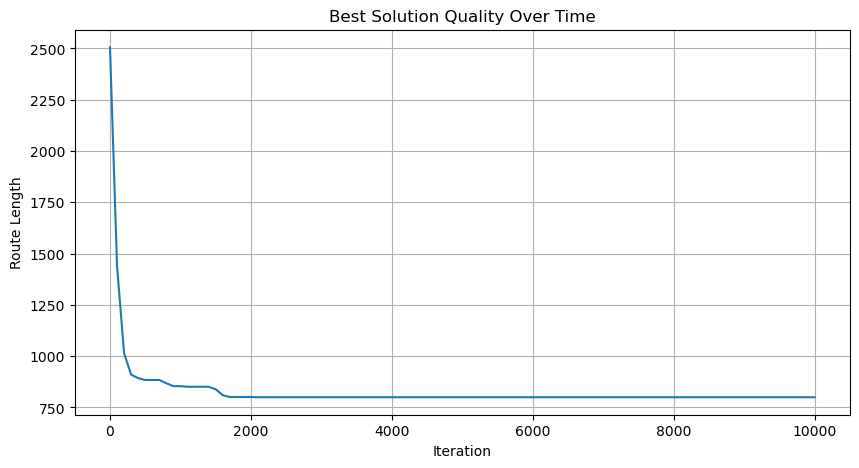

Best route found: [ 0  1  8 13 18 14  4  7  9 15 10  2 19  6 17 16  5 11 12  3  0]
Best route length: 800


In [14]:
best_route, best_length = simulated_annealing_tsp(cost_matrix, iterations=30000, cooling="sqrt", is_coords=False)
print("Best route found:", best_route)
print("Best route length:", best_length)